<h1 align="center"> Analysis of the determinant of the labour supply of females living in a couple </h1>

<h2 align="center"> An econometric approach </h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm

In [3]:
df = pd.read_csv("AMSE80.dat", sep=" ", header=None, encoding="latin")
df.columns = ["lfstat","educ","age","agesq","kids","kids11","goodhealth","nonlaby"]
print("dataset shape: {}".format(df.shape))
df.head()

dataset shape: (2948, 8)


,lfstat,educ,age,agesq,kids,kids11,goodhealth,nonlaby
0,1,11,54,2916,0,0,1,0.025000
1,0,18,30,900,2,0,1,0.166436
2,2,18,41,1681,1,1,1,0.111828
3,0,18,32,1024,4,0,1,0.678541
4,1,18,34,1156,2,0,1,0.158648


Our table is made of __8 variables__ and __2948 observations.__ We have : 

__5 quantitatives variables :__ `educ`, `age`, `agesq`, `kids`, `nonlaby` 

__3 qualitatives variables :__ `lfstat`, `kids11`, `goodhealth` 

Our variable of interest is `lfstat`. It qualifies __the kind of employment occupied by a woman__ and can take four different values :  

 * 0 if she does not work
 * 1 if she works as part-time
 * 2 if she works as full-time
 * 3 if she works as over-time

# 1. Exploratory data analysis

In [4]:
# Some useful functions 

def get_countplot(feature, x_label) : 
    '''
    function to get count for a given feature
    '''
    plt.figure(figsize=(10,6))
    g = sns.countplot(x=feature, data=df, palette="Blues")
    a = pd.DataFrame(df.groupby(feature).size(), columns=[feature]).reset_index(drop=True)
    for index, row in a.iterrows() :
        g.text(row.name, row[feature] + 10, row[feature], color='black', ha="center", fontsize=13)
    plt.xlabel(x_label, fontsize=18) ; plt.ylabel("Count",fontsize=18) ;
    plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)
    plt.show()

def get_distplot(feature, x_label) : 
    '''
    Function to get the distribution plot for a continuous feature
    '''
    plt.figure(figsize=(12,6)) ; sns.distplot(df[feature]) ;
    plt.xlabel(x_label, fontsize=18) ; plt.ylabel("Distribution", fontsize=18) ;
    plt.xticks(fontsize=14) ; plt.yticks(fontsize=14) ;
    plt.show()
    
def get_describe(feature) : 
    return df[[feature]].describe().T

def get_crosstab_graph(feature1, feature2) :
    
    table = pd.crosstab(df[feature1], df[feature2], normalize="index")
    fig, ax1 = plt.subplots(figsize=(10, 5))
    stacked = table.stack().reset_index().rename(columns={0:'value'})
    sns.barplot(x=stacked[feature2], y=stacked.value, hue=stacked[feature1], palette="Blues_d")
    plt.xticks(fontsize=16) ; plt.yticks(fontsize=13)
    plt.xlabel(feature2,fontsize=20) ; plt.ylabel("Proportion", fontsize=20)
    
    vals = ax1.get_yticks()
    ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    
    ax1.legend(title=feature1, title_fontsize=13, fontsize=13)

    for a in ax1.patches :
        height = a.get_height()
        ax1.text(a.get_x() + a.get_width()/1.8, height+0.005, "{:.0%}".format(height), ha='center', fontsize=12)
    plt.show()

## 1.1 Quantitative variables

* __Education :__

In [5]:
get_describe('educ')

,count,mean,std,min,25%,50%,75%,max
educ,2948.0,14.330393,3.215915,11.0,11.0,13.0,18.0,18.0


The females involved in this study have, __in average, 14 years of education.__ We can notice that __the minimum level of education among them is 11 years__, certainly due to a minimum compulsory education level to have before exiting from school. Let's also notice that the first quartile is still the minimum. So __at least 1 out of 4 females in this sample has left school after the minimum required education level.__

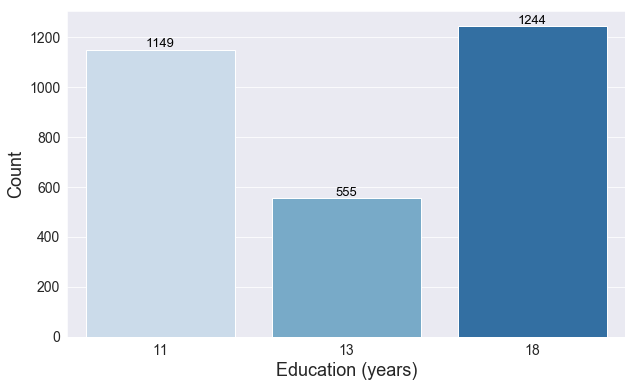

In [6]:
get_countplot("educ", "Education (years)")

* __Age :__

In [7]:
get_describe("age")

,count,mean,std,min,25%,50%,75%,max
age,2948.0,40.402307,10.578914,18.0,32.0,40.0,49.0,60.0


__The average (and median) age__ of the females in this sample is __40 years old :__ there is as much females under 40 years old than females above this age. The distribution of age seems to be centered of 40 years old. The minimum age is 18 and the maximum 60 years old : so __the study involves females in the beginning of their career as well as female at the end.__

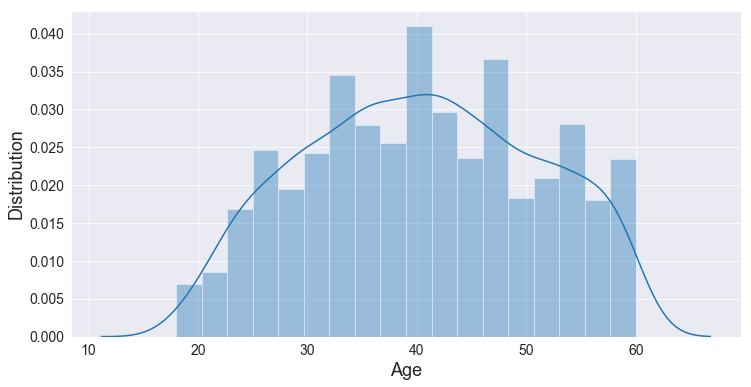

In [8]:
get_distplot("age","Age")

* __Kids :__

In [9]:
get_describe("kids")

,count,mean,std,min,25%,50%,75%,max
kids,2948.0,0.90502,1.051024,0.0,0.0,1.0,2.0,4.0


There are as much females with one kid or no kid than females with more than one kid (as the median is 1).

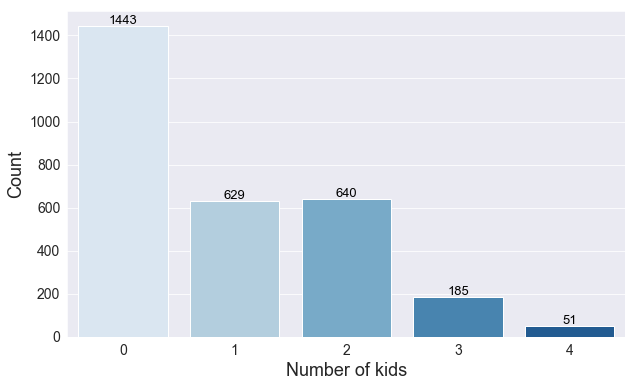

In [10]:
get_countplot("kids","Number of kids")

* __Nonlaby :__

In [11]:
get_describe("nonlaby")

,count,mean,std,min,25%,50%,75%,max
nonlaby,2948.0,0.2187,0.346833,0.0,0.005,0.111455,0.264799,4.4


Let `ui` be "unit of income". The average non labour income among the sampled females is `0.22ui`, whereas the median is `0.11ui`, that is half of the mean. This shows us the presence of extreme values and the fact that the non labour income distribution should be right tailed. In other words, there is appearently a lot of inequalities among females speaking of their non labour income. 

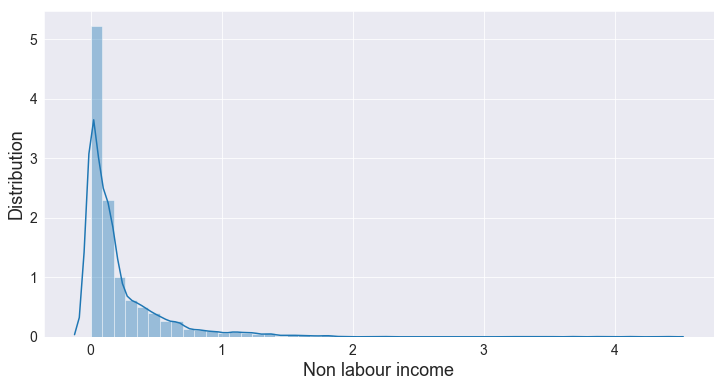

In [12]:
get_distplot("nonlaby", "Non labour income")

All these variables might influence the number of worked hour and so the labour supply of females.

## 1.2 Qualitative variables

* __lfstat :__

In [13]:
get_describe("lfstat")

,count,mean,std,min,25%,50%,75%,max
lfstat,2948.0,1.280868,0.928645,0.0,1.0,1.0,2.0,3.0


The most frequent value of `lfstat` is 1 : so the majority of females work in part-time jobs. There is even more women working in part-time jobs than women working in full-time jobs.

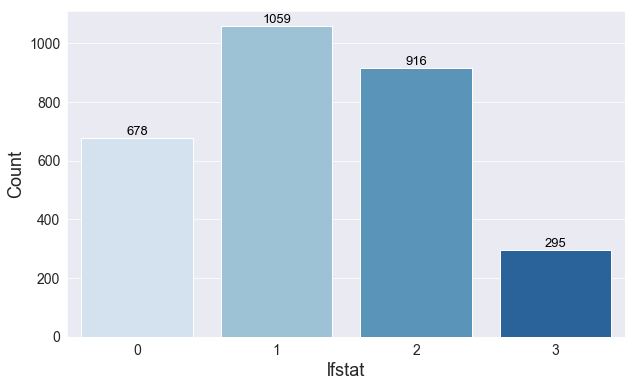

In [14]:
get_countplot("lfstat","lfstat")

* __kids11 :__

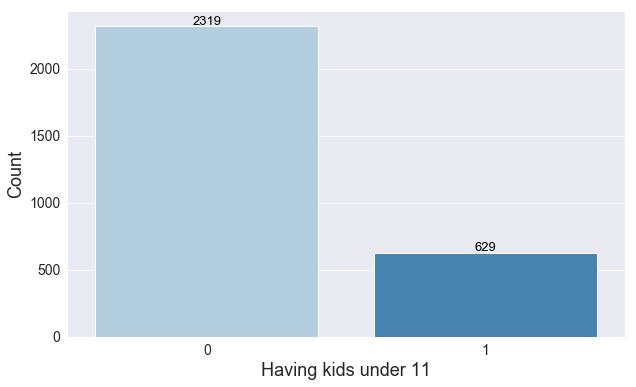

Proportion of women having kid(s) under 11: 21%


In [15]:
get_countplot("kids11", "Having kids under 11")
print("Proportion of women having kid(s) under 11: {:.0%}".format(df.kids11.mean()))

* __goodhealth :__ 

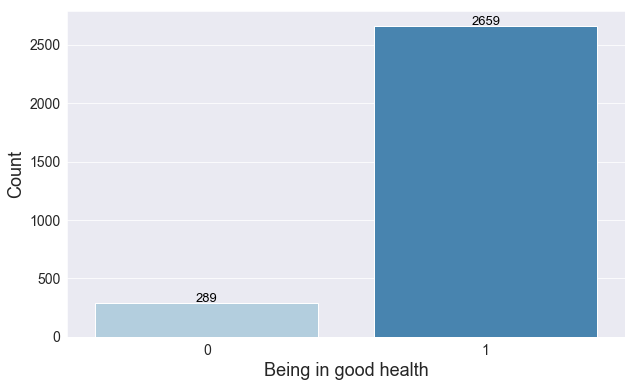

Proportion of females in bad health: 10%


In [16]:
get_countplot("goodhealth", "Being in good health")
print("Proportion of females in bad health: {:.0%}".format(1-df.goodhealth.mean()))

## 1.3 Variables crossing

* __kids11 * lfstat__

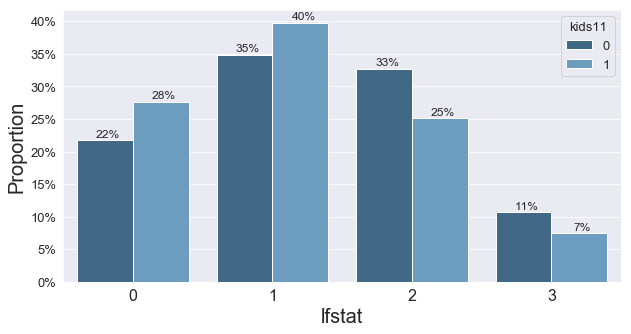

In [17]:
get_crosstab_graph("kids11","lfstat")

We can easily notice with the barplot that there are __more females not working at all in the group of females with kid(s) under 11 (28%) compared to the others females (22%).__

Also, there are clearly __less females working full time or over-time in the group of females having kid(s) under 11.__ So having kid(s) under the age of 11 years old could likely negatively impact the degree of labour supply of females.

* __goodhealth * lfstat__

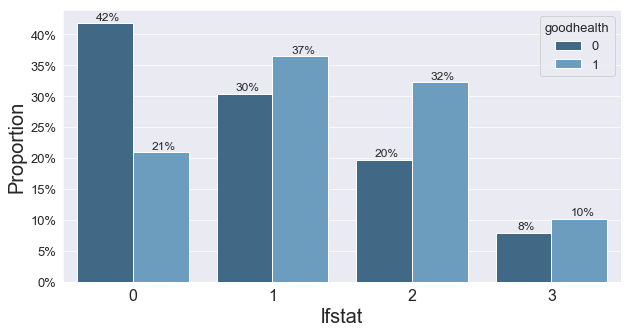

In [18]:
get_crosstab_graph("goodhealth","lfstat")

As we can notice through the barplot, __females in good health participate more to the labor market than those in poor health.__ Indeed, __42% of females in bad health do not work at all, versus 21% of females in good health__ : unsurprisingly, being in good health seems to favour the labour supply of females. 

# 2. Binary logit model

Let `work`  be a dummy variable to identify whether of not someone works such as :  

$$
work = \left\{
    \begin{array}{ll}
        1 & \mbox{if works}\\
        0 & \mbox{otherwise}
    \end{array}
\right.
$$

In [19]:
df["work"] = df.lfstat.apply(lambda x : 1 if x !=0 else 0)
X = df.drop(["work","lfstat"], axis=1)
y = df["work"]
logit = sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.473596
         Iterations 6


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   work   No. Observations:                 2948
Model:                          Logit   Df Residuals:                     2941
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.1218
Time:                        15:17:05   Log-Likelihood:                -1396.2
converged:                       True   LL-Null:                       -1589.7
                                        LLR p-value:                 1.612e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0543      0.014      3.759      0.000       0.026       0.083
age            0.0437      0.015      2.844      0.004       0.014       0.074
agesq         -0.0006      0.000     -2.667      0.008      -0.001      -0.000
kids          -0.4741      0.055     -8.691      0.000      -0.581      -0.367
kids11        -0.4466      0.110     -4.046      0.000      -0.663      -0.230
goodhealth     0.7856      0.141      5.562      0.000       0.509       1.062
nonlaby       -1.2645      0.151     -8.377      0.000      -1.560      -0.969
==============================================================================
"""

* All the coefficients are significant at the threshold of 5% as all the p-values are lower than 5%.

* Education, and being in good health respectively have a positive impact on the probability of working (as their coefficients are positives).

* Age seems to have a concave relationship with the probability of working (as the coefficient of age is positive but the one of agesq is negative) : so age positively impacts the probability of working but less and less as the female get older. 

* "Having kids", "having kid(s) under 11" and "the amount of non labor income" respectively negatively impacts the probability of working (as their coefficients are negatives).

## 2.1 Odds ratio

In [21]:
np.exp(result.params)

educ          1.055834
age           1.044631
agesq         0.999391
kids          0.622417
kids11        0.639793
goodhealth    2.193678
nonlaby       0.282392
dtype: float64

* Having one more year of education (everything else being equal) multiplies by 1.06 the probability of working : increase of the probability

* Having one more kid (everything else being equal) multiplies by 0.62 the probability of working : decrease of the probability

* Having kid(s) under 11 (everything else being equal) multiplies by 0.64 the probability of working : decrease of the probability

* Having a good health (everything else being equal) multiplies by 2.2 the probability of working : increase of the probability

* Having one more unit of non labor income (everything else being equal) multiplies by 0.3 (divides by 3) - the probability of working : decrease of the probability.

## 2.2 Marginal effects 

In [22]:
result.get_margeff(dummy=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                   work
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0083      0.002      3.782      0.000       0.004       0.013
age            0.0066      0.002      2.857      0.004       0.002       0.011
agesq      -9.254e-05   3.46e-05     -2.677      0.007      -0.000   -2.48e-05
kids          -0.0721      0.008     -8.972      0.000      -0.088      -0.056
kids11        -0.0714      0.018     -3.876      0.000      -0.108      -0.035
goodhealth     0.1372      0.027      5.026      0.000       0.084       0.191
nonlaby       -0.1922      0.022     -8.739      0.000      -0.235      -0.149
==============================================================================
"""

* One more year of education (everything else being equal), increases the probability of working by 0.83%
* Until a certain threshold, being older of one year (everything else being equal), increases the probability of working by 0.66%
* Having one more kid (everything else being equal), decreases the probability of working by 7.2%
* Compared to a female of same characteristics (same educ, age, kids, goodhealth, nonlaby) but having no kid(s) under 11, a female having kid(s) under 11 have 7.11% less chance of working
* Compared to a female of same characteristics (same educ, age, kids, kids11, nonlaby) but in poor health, a female in good health have 14% more chance of working.
* Having one more unit of non labor income (everything else being equal), decreases the probability of working of 19%

# 3. Multinomial logit model

In [23]:
y = df["lfstat"]
m_logit = sm.MNLogit(y, X)
m_result = m_logit.fit()

Optimization terminated successfully.
         Current function value: 1.165207
         Iterations 7


## 3.1 Marginal effects

In [24]:
m_result.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                 lfstat
Method:                          dydx
At:                           overall
==============================================================================
  lfstat=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0075      0.002     -3.424      0.001      -0.012      -0.003
age            0.0015      0.002      0.659      0.510      -0.003       0.006
agesq      -1.425e-05    3.5e-05     -0.408      0.684   -8.28e-05    5.43e-05
kids           0.0664      0.008      8.473      0.000       0.051       0.082
kids11         0.0489      0.017      2.902      0.004       0.016       0.082
goodhealth    -0.1135      0.021     -5.357      0.000      -0.155      -0.072
nonlaby        0.2152      0.022      9.613      0.000       0.171       0.259
------------------------------------------------------------------------------
  lfstat=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0062      0.003      2.391      0.017       0.001       0.011
age           -0.0142      0.003     -5.112      0.000      -0.020      -0.009
agesq          0.0003   4.01e-05      6.869      0.000       0.000       0.000
kids           0.1104      0.010     11.346      0.000       0.091       0.129
kids11         0.0326      0.021      1.550      0.121      -0.009       0.074
goodhealth     0.0233      0.029      0.803      0.422      -0.034       0.080
nonlaby        0.0237      0.035      0.668      0.504      -0.046       0.093
------------------------------------------------------------------------------
  lfstat=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0010      0.002      0.419      0.675      -0.004       0.006
age            0.0123      0.003      4.777      0.000       0.007       0.017
agesq         -0.0002   3.66e-05     -6.012      0.000      -0.000      -0.000
kids          -0.1191      0.011    -11.268      0.000      -0.140      -0.098
kids11        -0.0528      0.021     -2.525      0.012      -0.094      -0.012
goodhealth     0.0872      0.029      2.976      0.003       0.030       0.145
nonlaby       -0.2636      0.045     -5.841      0.000      -0.352      -0.175
------------------------------------------------------------------------------
  lfstat=3      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0003      0.002      0.197      0.843      -0.003       0.003
age            0.0004      0.002      0.209      0.834      -0.003       0.004
agesq      -4.091e-05   2.44e-05     -1.673      0.094   -8.88e-05       7e-06
kids          -0.0578      0.008     -7.014      0.000      -0.074      -0.042
kids11        -0.0287      0.016     -1.843      0.065      -0.059       0.002
goodhealth     0.0031      0.019      0.165      0.869      -0.034       0.040
nonlaby        0.0247      0.025      0.983      0.326      -0.025       0.074
==============================================================================
"""

## 3.2 Interpretation

__Let :__
 * Pr(y=0) the probability of not working
 * Pr(y=1) the probability of working part-time
 * Pr(y=2) the probability of working full-time
 * Pr(y=3) the probability of working over-time
 
*Note : The significance is defined at the threshold of 5%*

__Education :__

Having one more year of education only have a significant impact on Pr(y=0) and Pr(y=1). Having one more year of education decreases Pr(y=0) of 0.75%, whereas it increases Pr(y=1) of 0.62%. So education have a positive effect of the labour supply of females.

__Age :__

Being older of one year only have a significant impact on Pr(y=1) and Pr(y=2). Being older of one year decreases Pr(y=1) of 1.46%, whereas it increases Pr(y=2) of 1.23%. The marginal effect of `agesq` (age square) have an opposite sign with the one of age. So as their age increases, females tend to participate more in the labor market as they work less in part-time and more in full-time ; but this is true only until a steady or even a turning point.

__Kids :__

Having one more kid have a significant impact of the 4 probabilities (Pr(y=0), Pr(y=1), Pr(y=2), Pr(y=3)). The impact is positive on Pr(y=0) and Pr(y=1) : the first one increases of 6.64% and the second increases of 11.04% with one more kid. The impact is negative on Pr(y=2) and Pr(y=3) : the first one decreases of 11.91% and the seconde decreases of 5.78% with one more kid. So having one more kid decreases the labour supply of females.

__Kids under 11 :__

Having kid(s) under 11 only have a significant impact on Pr(y=0) and Pr(y=2). Compared to a female of same characteristics (same educ, age, kids, goodhealth, nonlaby) but having no kid(s) under 11, a female having kid(s) under 11 have 4.89% more risk of not working at all (Pr(y=0)) and 5.28% less chance of working full time (Pr(y=2)). So having kid(s) under 11 negatively impacts the labour supply of women.

__Good health :__

Having a good health only have a significant impact on Pr(y=0) and Pr(y=2). Compared to a female of same caracteristics (same educ, age, kids, goodhealth, nonlaby) but having a poor health, a female with a good health have 11.35% less risk of not working at all (Pr(y=0)) and 8.72% more chance of working full time (Pr(y=2)). So having a good health positively impacts labour supply of women.

__Non labor income :__

Having one unit more of non labor income only have a significant impact on Pr(y=0) and Pr(y=2). One unit more of non labor income increases the probability of not working at all (Pr(y=0)) of 21.52% and decreases the probability of working full-time of 26.36%. So non labor income tends to decrease the labor supply of females.